In [ ]:
!pip install librosa matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Biblioteke i moji audio fajlovi

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
# Putanje do audio datoteka
audio_files = [
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/0-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/1-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/2-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/3-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/4-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/5-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/6-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/7-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/8-122-20.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/9-122-20.wav"
]
ref_audio_files = [
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/0-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/1-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/2-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/3-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/4-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/5-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/6-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/7-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/8-42-22.wav",
    "/content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/ReferentneVrednosti/9-42-22.wav"
]

DTW Algoritam

In [ ]:
# Potrebne su mi dve implementacije DTW Algoritma, prva za dve dimenzije (MFCC, MEL SPEC), a druga za jednu dimenziju (LPC)
# DTW Algoritam za dve dimenzije
def dtw_distance(sequence1, sequence2):
    n, m = sequence1.shape[1], sequence2.shape[1]  # Broj kolona u MFCC
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0

    window = max(n,m)
    w = window * 1.8
    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w)):
            cost = np.linalg.norm(sequence1[:, i-1] - sequence2[:, j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match

    return dtw_matrix[n, m]


# DTW Algoritam za jednu dimenziju
def dtw_distance_lpc(sequence1, sequence2):
    n, m = len(sequence1), len(sequence2)
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0

    w = max(n,m)*1.4
    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w)):
            cost = np.abs(sequence1[i-1] - sequence2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match

    return dtw_matrix[n, m]

def dtw_distance_windowed(sequence1, sequence2, window_size):
    n, m = sequence1.shape[1], sequence2.shape[1]  # Broj kolona u MFCC
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0

    w = max(window_size, abs(n-m))  # Prozor

    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w)):
            cost = np.linalg.norm(sequence1[:, i-1] - sequence2[:, j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match

    return dtw_matrix[n, m]

def dtw_distance_lpc_windowed(sequence1, sequence2, window_size):
    n, m = len(sequence1), len(sequence2)
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0

    w = max(window_size, abs(n-m))  # Prozor

    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w)):
            cost = np.abs(sequence1[i-1] - sequence2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match

    return dtw_matrix[n, m]



MFCC

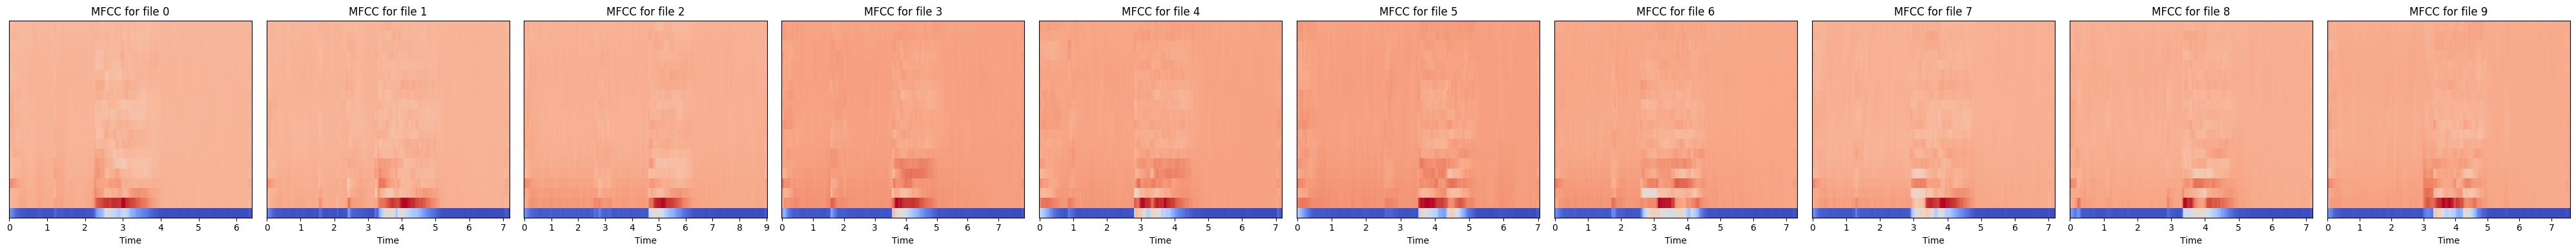

Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/0-122-20.wav is 0
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/1-122-20.wav is 0
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/2-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/3-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/4-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/5-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/6-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/7-122-20.wav is 7
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/8-122-20.wav is 8
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/9-122-20

In [ ]:
# Broj audio datoteka
num_files = len(audio_files)

# Kreiranje subplots-a sa 1 redom i num_files kolonama
fig, axes = plt.subplots(1, num_files, figsize=(40, 4))  # Podesite veličinu prema potrebi

# Prolazak kroz sve audio datoteke i njihovo crtanje
for i, file in enumerate(audio_files):
    # Učitavanje audio datoteke
    y, sr = librosa.load(file, sr=None)

    # Izvlačenje MFCC karakteristika
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    # Izdvajanje samo broja cifre iz imena datoteke
    file_number = os.path.basename(file)[0]

    # Vizualizacija MFCC karakteristika
    librosa.display.specshow(mfcc, x_axis='time', ax=axes[i])
    axes[i].set_title(f'MFCC for file {file_number}')

# Prikazivanje svih grafikona
plt.tight_layout()
plt.show()
def recognize_digit_mfcc(audio_file, ref_audio_files, feature_func):
    # Učitavanje i izračunavanje karakteristika za audio snimak
    y, sr = librosa.load(audio_file, sr=None)
    audio_features = feature_func(y = y, sr = sr)

    min_dtw_distance = float('inf')
    recognized_digit = None

    # Upoređivanje sa svakim referentnim snimkom
    for ref_file in ref_audio_files:
        # Učitavanje i izračunavanje karakteristika za referentni snimak
        ref_y, ref_sr = librosa.load(ref_file, sr=None)
        ref_features = feature_func(y = ref_y, sr = ref_sr)

        # Izračunavanje DTW rastojanja
        dtw_dist = dtw_distance(audio_features, ref_features)
        if dtw_dist < min_dtw_distance:
            min_dtw_distance = dtw_dist
            recognized_digit = os.path.basename(ref_file)[0]  # Pretpostavka da je cifra prvi karakter imena fajla

    return recognized_digit

# Provera prepoznavanja cifara za sve audio snimke
for audio_file in audio_files:
    recognized_digit = recognize_digit_mfcc(audio_file, ref_audio_files, librosa.feature.mfcc)
    print(f"Recognized digit for {audio_file} is {recognized_digit}")

Mel Spectrogram

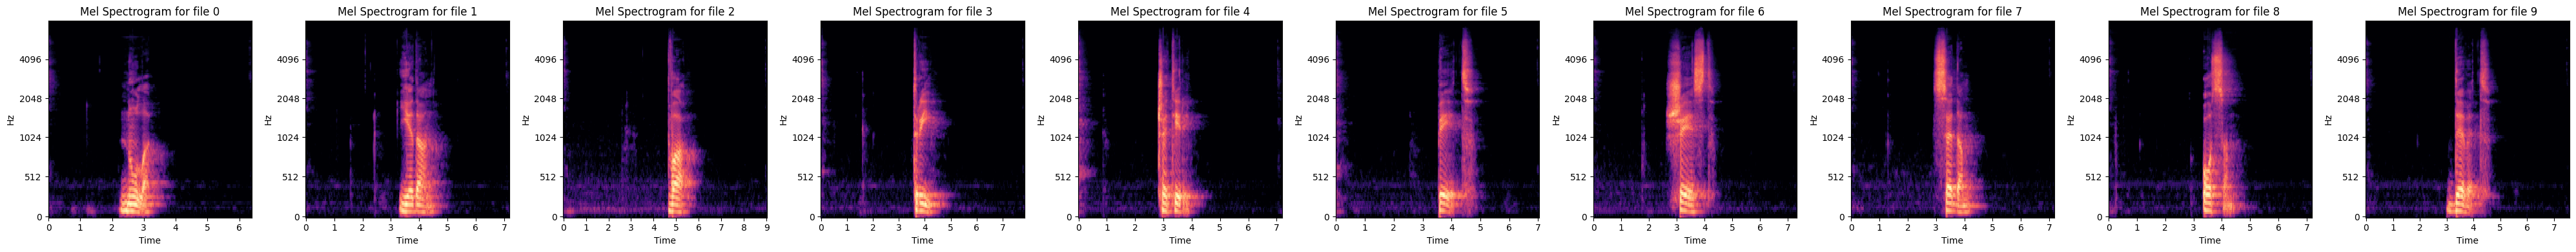

Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/0-122-20.wav is 0
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/1-122-20.wav is 7
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/2-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/3-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/4-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/5-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/6-122-20.wav is 4
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/7-122-20.wav is 7
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/8-122-20.wav is 8
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/9-122-20

In [ ]:
# Broj audio datoteka
num_files = len(audio_files)

# Kreiranje subplots-a sa 1 redom i num_files kolonama
fig, axes = plt.subplots(1, num_files, figsize=(40, 4))  # Podesite veličinu prema potrebi

# Prolazak kroz sve audio datoteke i njihovo crtanje
for i, file in enumerate(audio_files):
    # Učitavanje audio datoteke
    y, sr = librosa.load(file, sr=None)

    # Izvlačenje Mel spektrograma
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)

    # Vizualizacija Mel spektrograma
    librosa.display.specshow(librosa.power_to_db(mel_spect, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', ax=axes[i])
    axes[i].set_title(f'Mel Spectrogram for file {os.path.basename(file)[0]}')

    # Dodavanje colorbara svakom grafikonu može biti nepraktično u ovom formatu
    # Ako je neophodno, možete dodati zajednički colorbar pored poslednjeg grafikona

# Prikazivanje svih grafikona
plt.tight_layout()
plt.show()

def recognize_digit_melspec(audio_file, ref_audio_files):
    # Učitavanje i izračunavanje Mel spektrograma za audio snimak
    y, sr = librosa.load(audio_file, sr=None)
    audio_features = librosa.feature.melspectrogram(y=y, sr=sr)
    audio_features_db = librosa.power_to_db(audio_features, ref=np.max)

    min_dtw_distance = float('inf')
    recognized_digit = None

    # Upoređivanje sa svakim referentnim snimkom
    for ref_file in ref_audio_files:
        # Učitavanje i izračunavanje Mel spektrograma za referentni snimak
        ref_y, ref_sr = librosa.load(ref_file, sr=None)
        ref_features = librosa.feature.melspectrogram(y=ref_y, sr=ref_sr)
        ref_features_db = librosa.power_to_db(ref_features, ref=np.max)

        # Izračunavanje DTW rastojanja
        dtw_dist = dtw_distance(audio_features_db, ref_features_db)
        if dtw_dist < min_dtw_distance:
            min_dtw_distance = dtw_dist
            recognized_digit = os.path.basename(ref_file)[0]  # Pretpostavka da je cifra prvi karakter imena fajla

    return recognized_digit

# Provera prepoznavanja cifara za sve audio snimke koristeći Mel spektrogram
for audio_file in audio_files:
    recognized_digit = recognize_digit_melspec(audio_file, ref_audio_files)
    print(f"Recognized digit for {audio_file} is {recognized_digit}")

LPC

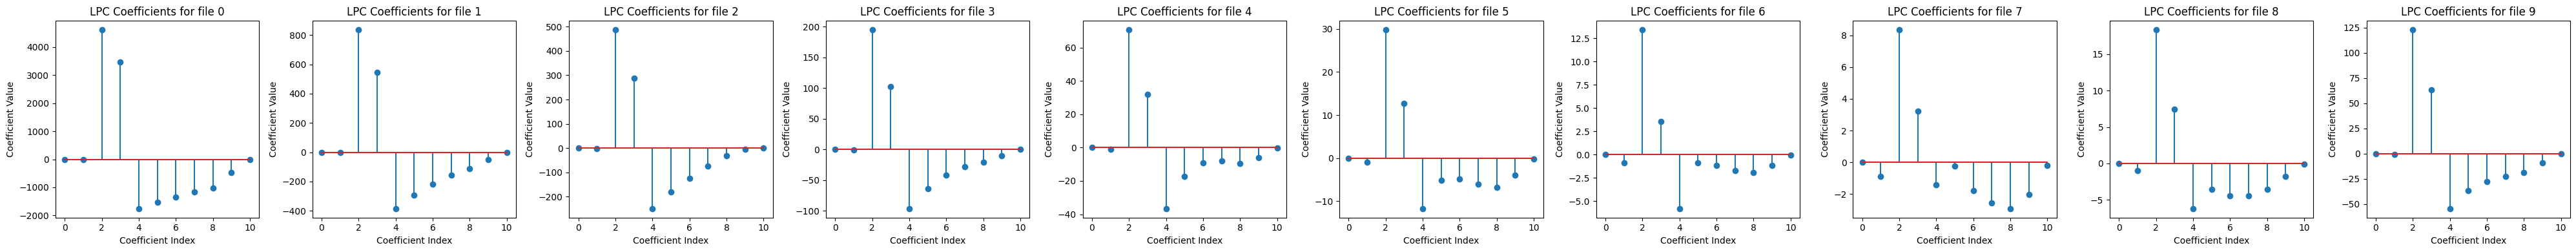

Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/0-122-20.wav is 2
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/1-122-20.wav is 5
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/2-122-20.wav is 5
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/3-122-20.wav is 7
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/4-122-20.wav is 8
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/5-122-20.wav is 8
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/6-122-20.wav is 8
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/7-122-20.wav is 8
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/8-122-20.wav is 8
Recognized digit for /content/drive/MyDrive/PrepoznavanjeGovora/DrugiDomaci/Uzorci/9-122-20

In [ ]:
def levinson_durbin(signal, order):
    """Implementacija Levinson-Durbin algoritma za izračunavanje LPC koeficijenata."""
    # Autokorelacija
    autocorr = scipy.signal.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr) // 2:]

    # Inicijalizacija
    a = np.zeros(order + 1)
    e = autocorr[0]

    for i in range(1, order + 1):
        # Levinson-Durbin rekurzija
        acc = sum([a[j] * autocorr[i - j] for j in range(1, i)])
        next_coeff = - (autocorr[i] + acc) / e

        # Azuriranje koeficijenata
        a[1:i+1] = a[1:i+1] + next_coeff * a[1:i+1][::-1]
        a[i] = next_coeff

        # Azuriranje greske
        e *= 1 - next_coeff ** 2

    return a

# Broj audio datoteka
num_files = len(audio_files)

# Kreiranje subplots-a sa 1 redom i num_files kolonama
fig, axes = plt.subplots(1, num_files, figsize=(40, 4))  # Podesite veličinu prema potrebi

# Prolazak kroz sve audio datoteke i njihovo crtanje
for i, file in enumerate(audio_files):
    # Učitavanje audio datoteke
    y, sr = librosa.load(file, sr=None)

    # Broj LPC koeficijenata
    lpc_order = 10  # Pretpostavka da koristite 10 LPC koeficijenata

    # Izračunavanje LPC koeficijenata
    lpc_coeffs = levinson_durbin(y, lpc_order)

    # Vizualizacija LPC koeficijenata
    axes[i].stem(lpc_coeffs)
    axes[i].set_title(f'LPC Coefficients for file {os.path.basename(file)[0]}')
    axes[i].set_xlabel('Coefficient Index')
    axes[i].set_ylabel('Coefficient Value')

# Prikazivanje svih grafikona
plt.tight_layout()
plt.show()


def recognize_digit_lpc(audio_file, ref_audio_files, lpc_func, lpc_order):
    # Učitavanje i izračunavanje LPC karakteristika za audio snimak
    y, sr = librosa.load(audio_file, sr=None)
    audio_features = lpc_func(y, lpc_order)

    min_dtw_distance = float('inf')
    recognized_digit = None

    # Upoređivanje sa svakim referentnim snimkom
    for ref_file in ref_audio_files:
        # Učitavanje i izračunavanje LPC karakteristika za referentni snimak
        ref_y, ref_sr = librosa.load(ref_file, sr=None)
        ref_features = lpc_func(ref_y, lpc_order)

        # Izračunavanje DTW rastojanja
        dtw_dist = dtw_distance_lpc(audio_features, ref_features)
        if dtw_dist < min_dtw_distance:
            min_dtw_distance = dtw_dist
            recognized_digit = os.path.basename(ref_file)[0]  # Pretpostavka da je cifra prvi karakter imena fajla

    return recognized_digit

# Provera prepoznavanja cifara za sve audio snimke koristeći LPC
for audio_file in audio_files:
    recognized_digit = recognize_digit_lpc(audio_file, ref_audio_files, levinson_durbin, 10)
    print(f"Recognized digit for {audio_file} is {recognized_digit}")